<a href="https://colab.research.google.com/github/smehan4/PortfolioProjects/blob/main/Credit_Card_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Retention Analysis

##Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

##Reading in Dataset

In [3]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default>, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool | lib.NoDefault' = <no_default>, date_parser: 'Callable | lib.NoDefault' = <no_default>, date_format: 'str | dict[Hashable, str] | None' = None, dayfirst: 'bool' = False, cache_dates: 'bool' = True, iterator: 'bool' = False, chunksize: 'int | None' = None, compression: 'CompressionOptions' = 'infer', thousands: 'str | None' = None, decimal: 'str' = '.', lineterminator: 'str | None' = None, quotechar: 'str' = '"', quoting: 'int' = 0, doublequote: 'bool' = True, escapechar: 'str | None' = None, comment: 'str | None' = None, encoding: 'str | None' = None, encoding_errors: 'str | None' = 'strict', dialect: 'str | csv.Dialect | None' = None, on_bad_lines: 'str' = 'error', delim_whitespace: 'bool | lib.NoDefault' = <no_default>, low_memory: 'bool' = True, memory_map: 'bool' = False, float_precision: "Literal['high', 'legacy'] | None" = None, storage_options: 'StorageOptions | None' = None, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>) -> 'DataFrame | TextFileReader'>

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Collab Files/BankChurners.csv")

data.shape
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#General Cleaning Techniques

##Cleaning Duplicates

In [5]:
data['CLIENTNUM'].nunique()

10127

In [6]:
data.drop_duplicates(inplace=True)
data.shape

(10127, 23)

####No duplicates based on CLIENTNUM! So we are good to go!!

##Subsetting Data

In [7]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

##Datatypes

In [9]:
data.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


##Missing Values

In [10]:
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


##Data Transformation: Binning

In [11]:
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())

26
73


In [12]:
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

data[data['Customer_Age']==30]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins
789,754654383,Existing Customer,30,M,2,High School,Married,Less than $40K,Blue,23,4,2,0,2997.0,1393,1604.0,1.120,1577,35,0.522,0.465,30s
803,711748983,Existing Customer,30,M,1,High School,Married,$60K - $80K,Blue,17,3,3,2,7906.0,1631,6275.0,0.889,1946,45,0.552,0.206,30s
890,779149683,Existing Customer,30,F,0,Graduate,Divorced,Unknown,Blue,13,5,1,2,7772.0,1890,5882.0,0.754,2585,75,0.829,0.243,30s
939,772375533,Existing Customer,30,M,1,Graduate,Married,$80K - $120K,Blue,19,5,3,2,9959.0,2377,7582.0,1.100,1560,39,0.696,0.239,30s
974,714131058,Existing Customer,30,M,0,Graduate,Unknown,$60K - $80K,Blue,36,3,5,3,18513.0,2517,15996.0,0.524,1567,33,0.941,0.136,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,715923408,Existing Customer,30,F,0,College,Married,Less than $40K,Blue,19,4,2,3,4184.0,1254,2930.0,0.549,14999,110,0.719,0.300,30s
10004,764316708,Existing Customer,30,F,1,High School,Single,Less than $40K,Blue,23,3,2,2,3955.0,2352,1603.0,0.779,16423,109,0.758,0.595,30s
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575,30s
10055,710066133,Attrited Customer,30,M,0,Graduate,Single,Less than $40K,Silver,36,4,3,3,12833.0,0,12833.0,0.853,9619,75,0.786,0.000,30s


#EDA (Exploratory vs Explanatory)

##Sanity Checks

In [13]:
data['Attrition_Flag'].value_counts()


,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


####To check our 16% we can print the values as follows.

In [14]:
data['Attrition_Flag'].value_counts()['Attrited Customer'] / data.shape[0]

0.1606596227905599

####If we wanted to keep this in our file to dynamically change if our dataset changes, we can write the following code.

In [15]:
print(round(data['Attrition_Flag'].value_counts()['Attrited Customer'] / data.shape[0] * 100, 2), "% of our customers have churned")

16.07 % of our customers have churned


#Summary Statistics

###Typically we are looking to understand
1. How many instances are there in dataset (frequency or counts)
2. A measure of central tendency (mean, median, mode)
3. The spread of dataset (variation, standard deviation)

In python, we can use the `.describe()` method to see these metrics for all the numerical variables in the dataset including: `quantiles`, `min`, `max` and `std`.

`std` helps us understand how spread out the values of that variable are ---> the bigger the `std` the bigger the spread

In [16]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Here we can see things like:

    1) The longest customer in this dataset has been around for 56 months or about 4 years and a half. (Max)
    2) The average number of relationships a customer has is ~4. (Mean and median agree here)
    3) The average credit limit is $8.6K, but the median credit limit is much lower at $4.5K. (signals some skew in this variable)

In [17]:
print('The average Total_Relationship_Count is', round(np.mean(data['Total_Relationship_Count']), 2), 'and the median is', np.median(data['Total_Relationship_Count']))

The average Total_Relationship_Count is 3.81 and the median is 4.0


In [18]:
print('The average Credit_Limit is $', round(np.mean(data['Credit_Limit']), 2), 'and the median is $', np.median(data['Credit_Limit']))

The average Credit_Limit is $ 8631.95 and the median is $ 4549.0


###Let's start with Customer Age

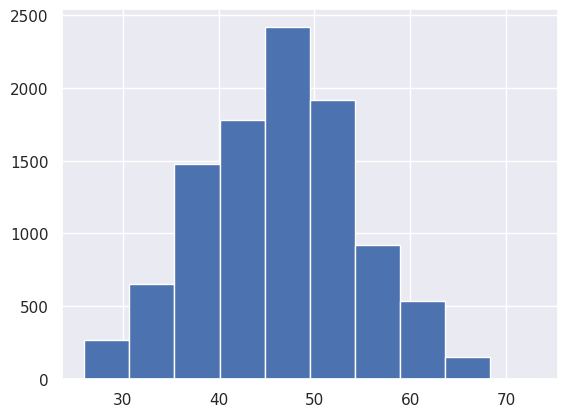

In [19]:
plt.hist(data['Customer_Age']);

`matplotlob` has many parameters you can use to customized this chart, but the most important one for histograms are `bins`. Bins are set to 10 by default and are a way to group the values together to allow a high level distribution to render. However, this is a good one to adjust if the bins are too coarse and are not allowing us to fully see the distribution.

Based on our diagrams above, `Customer_Age` looks fairly normally distributed. Nice, this tells us that it's possible to find normally distributed data in the wild, which is good! To read this chart, the yaxis represents frequencies, or in this case Customers and the xaxis represents the age bins. So, approximately ~2400 customers are within 45-50. This is not meant to be an exact measure, but more an indication of the distribution.

Let's look at the distribution for `Months_on_book`.

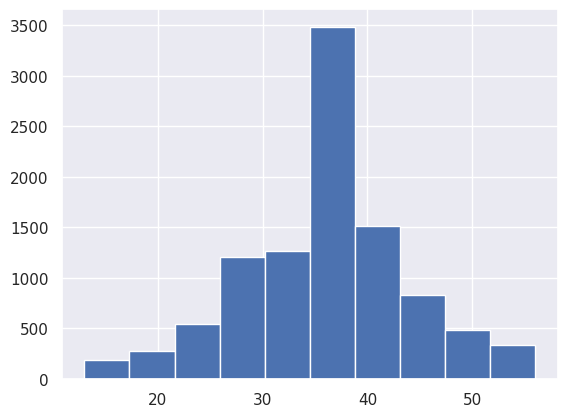

In [20]:
plt.hist(data['Months_on_book']);

It looks pretty normal outside of a very strong peak at ~36 months (roughly 3500 customers). If we had access to the owner to ask more questions about this, we would want to know if this was a **data error** (default months for those without a record), or if there was a major marketing campaign that brought in a lot of users 36 months ago.

Now let's look at the `Credit_Limit` variable that we looked at before:

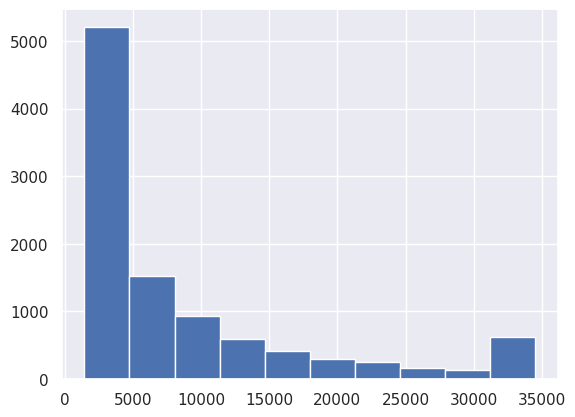

In [21]:
plt.hist(data['Credit_Limit']);

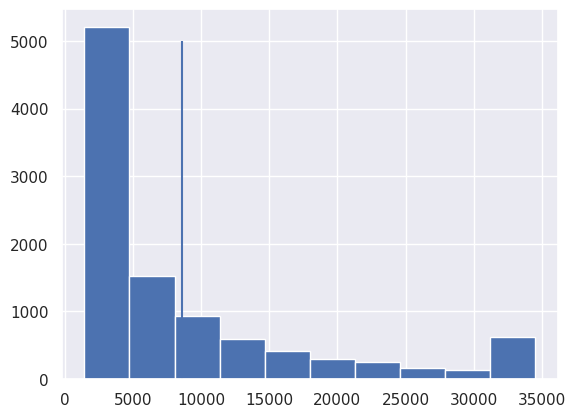

In [22]:
plt.hist(data['Credit_Limit']);
plt.vlines(data['Credit_Limit'].mean(), 0, 5000)
plt.vlines(data['Credit_Limit'].median(), 0, 5000)

In [23]:
data['Credit_Limit'].median() # can't see the median line here...let's try to fix this

4549.0

In [24]:
data['Credit_Limit'].mean()

8631.953698034955

Let's improve this visual a bit by increasing the `bin` size, changing the color of the lines and adding some annotations. Next, let's add a title and some x and y labels as well.  

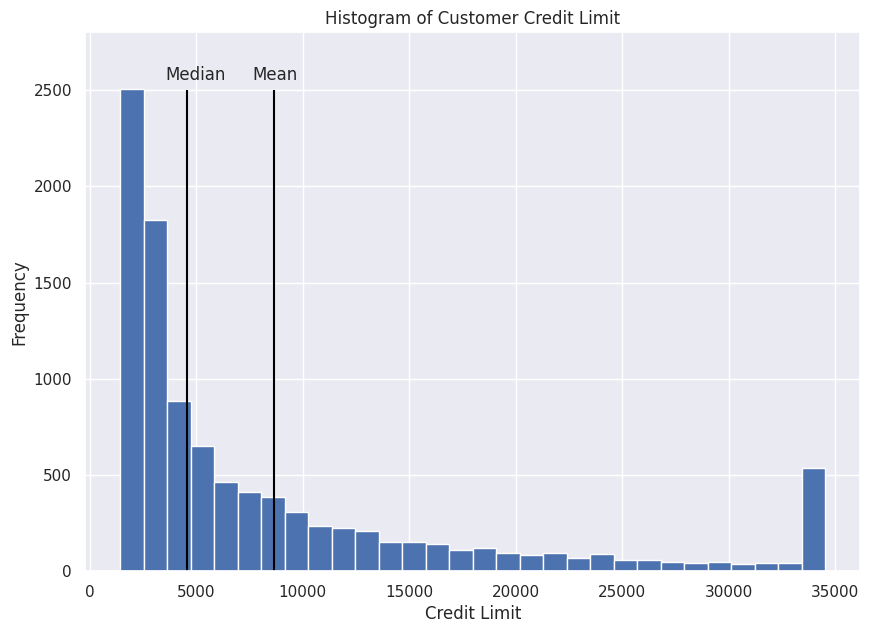

In [25]:
plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'], bins=30);

plt.vlines(data['Credit_Limit'].mean(), 0, 2500, colors='Black')
plt.vlines(data['Credit_Limit'].median(), 0, 2500, colors='Black')
plt.text(data['Credit_Limit'].mean()-1000, 2500+50, "Mean")
plt.text(data['Credit_Limit'].median()-1000, 2500+50, "Median")
plt.ylim(0, 2800);
plt.title("Histogram of Customer Credit Limit");
plt.ylabel('Frequency');
plt.xlabel('Credit Limit');

**MUCH** better. Now, it's clear that this Credit Limit is a skewed variable, being skewed higher (or to the right) by a few customers with high Credit Limits.

Based on its relation to our feet, we know this is **right skewed**.

Let's try `Total_Trans_Ct` that looked to have a somewhat similar mean and median.

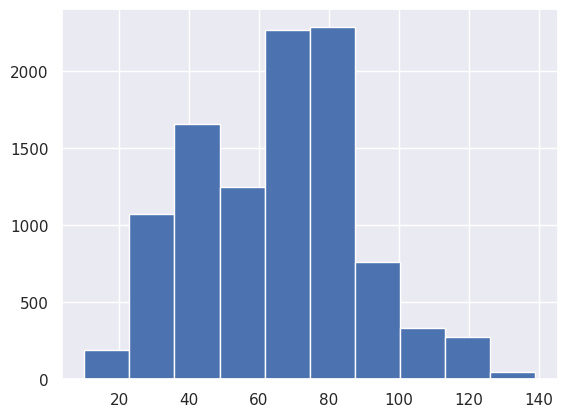

In [26]:
plt.hist(data['Total_Trans_Ct']);

It might not be obvious that this is a **bimodal** distribution, let's increase the bin size. Default is 10. Bimodal data typically will show two peaks of data-- which usually indicates you’ve got two different groups.

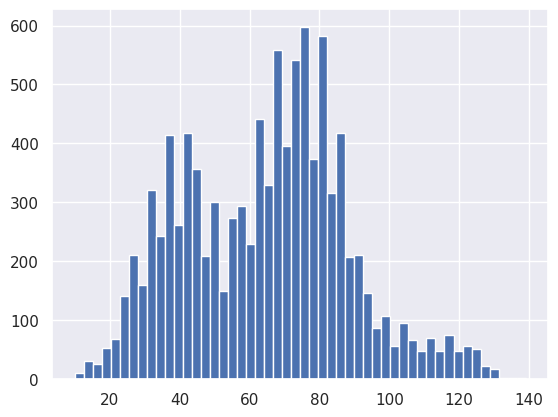

In [27]:
plt.hist(data['Total_Trans_Ct'], bins=50);

#Data Transformations: Normalization and Log

There are simple ways to transform a skewed distribution into one that looks more "normal" or to normalize between two values. Let's take a look at a few together.

We will cover two very common transformations:

    1) Normalization (also referred to as a min-max scaler): Normalization will convert all data points to values between two values (usually 0 and 1).
    2) Log transformation: This helps make the data "less skewed". When using log with Python, the default base is usually e.

We will use the out of the box log transformation from the numpy library and write our own function for normalization.

In [28]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [29]:
data['Credit_Limit_Normalized'] = normalize(data['Credit_Limit'])
data['Credit_Limit_Log_Transformed'] = np.log(data['Credit_Limit'])

To see exactly how the transformations impact the variables we are looking at, we will use seaborn subplots to plot them side by side using `subplots`.

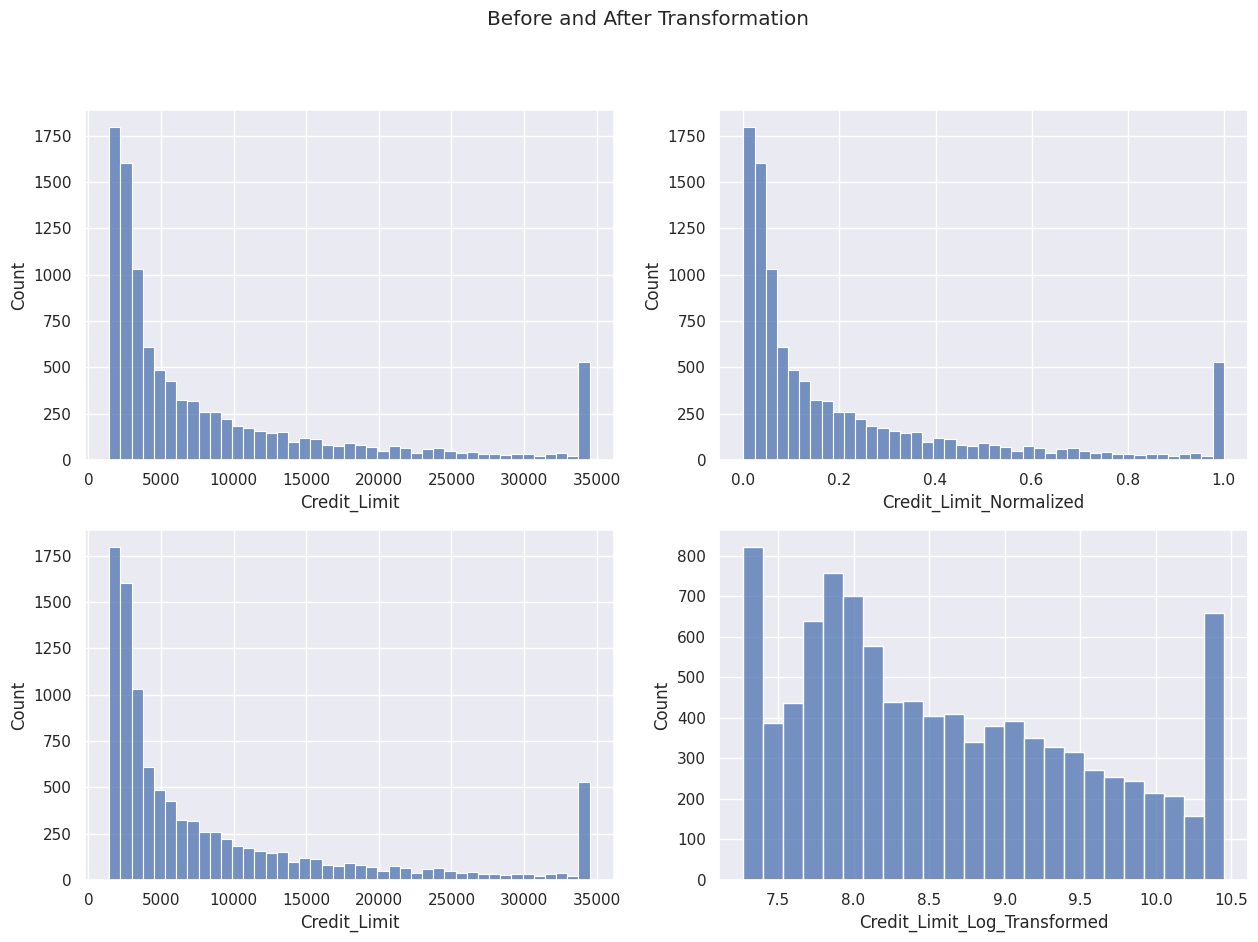

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Before and After Transformation')

#create boxplot in each subplot
sns.histplot(data, x="Credit_Limit", ax=axes[0,0])
sns.histplot(data, x="Credit_Limit_Normalized", ax=axes[0,1])
sns.histplot(data, x="Credit_Limit", ax=axes[1,0])
sns.histplot(data, x="Credit_Limit_Log_Transformed", ax=axes[1,1]);

As you can see above, when we **Normalized** the values, they maintained their shape but now are bound between 0 and 1. This method is helpful when comparing across many variables of different magnitudes (ex. Number of Relationships which ranges between 1-6 vs Credit Limit which ranges between 0 and 35K).

However, it's clear that the **Log-Transformation** made an impact on the distribution!

#Other Distribution Plots

##Box and Whisker Plot

Other ways to look at distributions include Box and Whisker plots, Pyramid Chart, Candlestick charts, etc. We will review Box and Whisker and Pyramid Charts together. Let's look at Total Transaction Count by Gender on a **Box and Whisker Plot**.

The box and whisker plot allows the analyst to quickly find and identify the median, quartiles and any outliers.

<Axes: xlabel='Gender', ylabel='Total_Trans_Ct'>

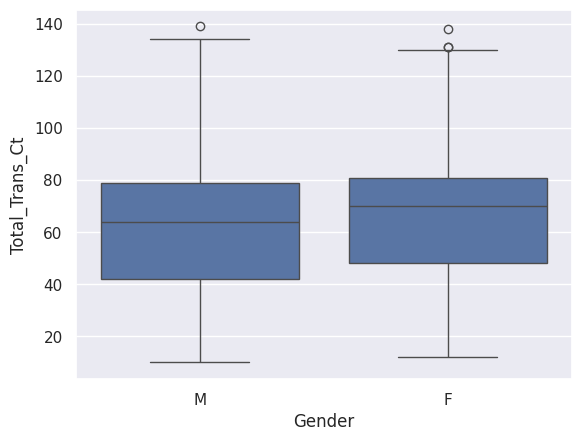

In [31]:
sns.boxplot(x=data["Gender"], y=data['Total_Trans_Ct'])

This plot quickly shows us that the median transaction account is slightly higher for females than males and outliers seem to be present among both groups.

##Pyramid Chart

What if the question we wanted to know is if there was a difference in the distribution of customers by age and gender? A Pyramid chart could get us there!

Pyramid charts don't come out of the box in the matplolib or seaborn packages, so we will use Plotly, an interactive visualization package to pull this one off.

For this, we will need to prepare our data. Remember the `Customer_Age_bins` we made before? We will use them now.

To get the data in the format we need, we will need to aggregate the data up to the Age and Gender level.

In [32]:
pyramid = data.groupby(['Gender', 'Customer_Age_bins'])['CLIENTNUM'].nunique().reset_index()
pyramid

<ipython-input-32-8c049a3b032c>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Gender,Customer_Age_bins,CLIENTNUM
0,F,20s,93
1,F,30s,956
2,F,40s,2410
3,F,50s,1619
4,F,60s,280
5,F,70s,0
6,M,20s,102
7,M,30s,885
8,M,40s,2151
9,M,50s,1379


In [33]:
women_bins = np.array(-1* pyramid[pyramid['Gender']=='F']['CLIENTNUM'])
men_bins = np.array(pyramid[pyramid['Gender']=='M']['CLIENTNUM'])

y = list(range(20, 100, 10))

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-3000, 3000],
                       tickvals=[-2500,-2000,-1500,-1000,-500, 0, 500,1000,1500,2000,2500],
                       ticktext=[2500,2000,1500,1000,500, 0, 500,1000,1500,2000,2500],
                       title='Customers'),
                   barmode='overlay',
                   bargap=0.1)

p_data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
#                text=men_bins.astype('int'),
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=p_data, layout=layout))

Here we see there is no real difference in the distribution of Customers by Age and Gender. The majority of customers are in their 40s--*a similar finding to the one earlier when we were looking at histograms.*

#Comparing Categories

Comparing histograms to bar charts, let's take a look at the same dimensions we used above (Age and Gender) and use a `barplot` to visualize these groups. The main difference here will be that we are **not looking at frequencies anymore**, we are specifying and plotting a measure of our choice. Here, we will look at `Credit_Limit` by Age and Gender. Let's plot!

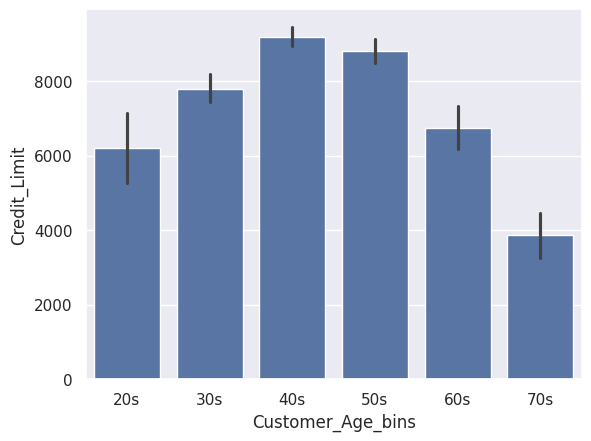

In [34]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean);

Notice how I've passed through an estimator. When the data is given at the Customer level (not aggregated), then it will estimate the values for that group (the default is the mean, but we can switch that out). You'll notice `error bars` and this is to show that the bar height ends where the mean for that group is, but there are Customers with more or less, as dictated by the length of the error bar.

Let's see what happens when we add in `Gender`, which we can do by specifying the `Hue`.

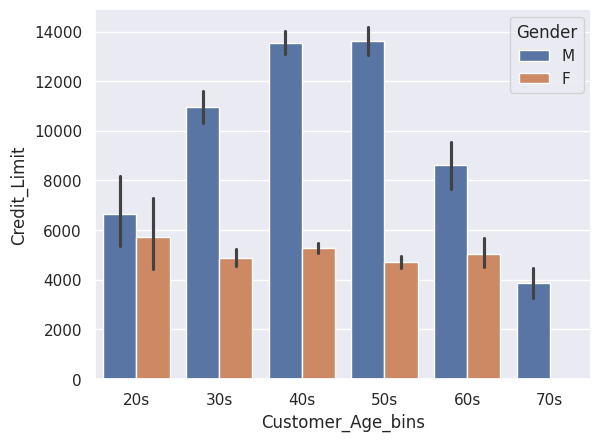

In [35]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.mean);

Notice how Females are getting credit limits much lower than Males! Interesting insight. Just to sanity check ourselves, let's try the median instead of the mean here. Let's swap that using the `estimator` parameter.

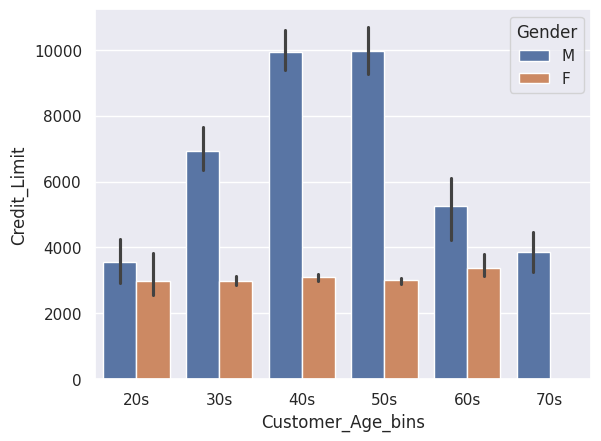

In [36]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.median);

Looks like it's true that men on average are getting accepted for much more than women are for our company. If we wanted a bar chart without the error bars, we would need to do a quick aggregation.

In [37]:
barplot = data.groupby(['Customer_Age_bins', 'Gender'])['Credit_Limit'].mean().reset_index()
barplot

<ipython-input-37-49fe0a6b507f>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_Age_bins,Gender,Credit_Limit
0,20s,F,5731.101075
1,20s,M,6649.367647
2,30s,F,4867.775314
3,30s,M,10948.605311
4,40s,F,5270.821784
5,40s,M,13557.484844
6,50s,F,4702.649475
7,50s,M,13635.717041
8,60s,F,5053.412857
9,60s,M,8626.832000


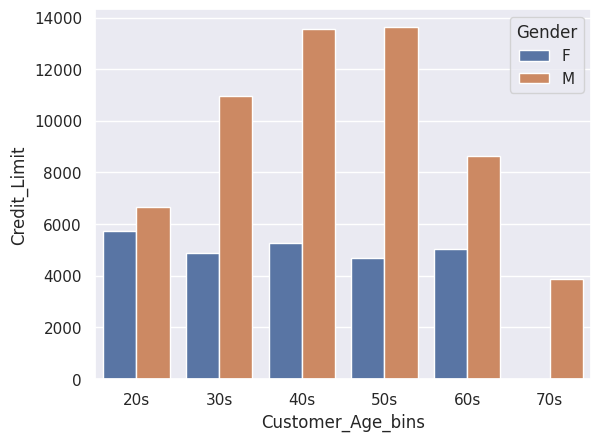

In [38]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=barplot);

We can turn the visual so that the bars go horizontally with just one parameter change. Let's try! Here we swap the default `orient` to "h".

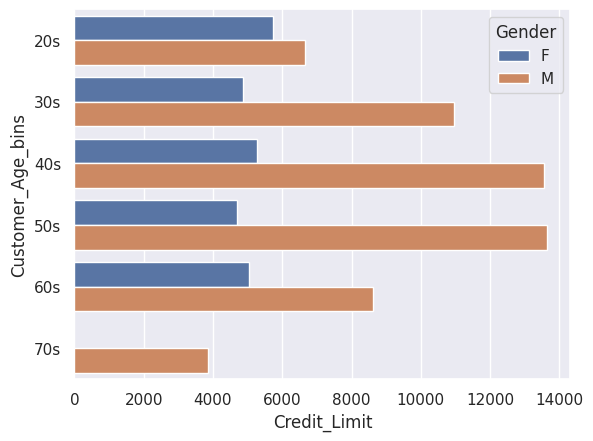

In [39]:
sns.barplot(x='Credit_Limit', y='Customer_Age_bins', hue='Gender', data=barplot, orient='h');

There are times where a bar chart may have too many categories that are too close to tell the difference between the heights. A small adaptation from the `Bar Chart` is the `Lollipop Chart`, let's make it together.

In [40]:
lollipop = data.groupby(['Customer_Age_bins'])['Credit_Limit'].mean().reset_index().sort_values('Credit_Limit')
lollipop

<ipython-input-40-ba101927d6bc>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_Age_bins,Credit_Limit
5,70s,3860.500000
0,20s,6211.425128
4,60s,6738.987925
1,30s,7790.933677
3,50s,8811.622181
2,40s,9178.870949


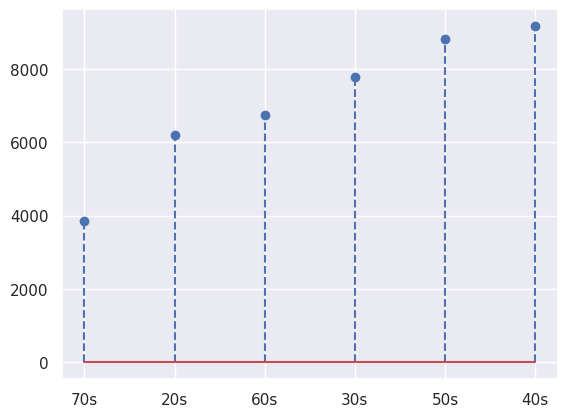

In [41]:
plt.stem(lollipop['Customer_Age_bins'], lollipop['Credit_Limit'], linefmt='--');

Most common, is to see this chart with the bars flowing **horizontally** and **sorted** from highest to lowest so we can visually pick up how the categories compare with one another. Otherwise they can be more confusing to read so use your best judgement on when to use them. We can do that here with the following code:

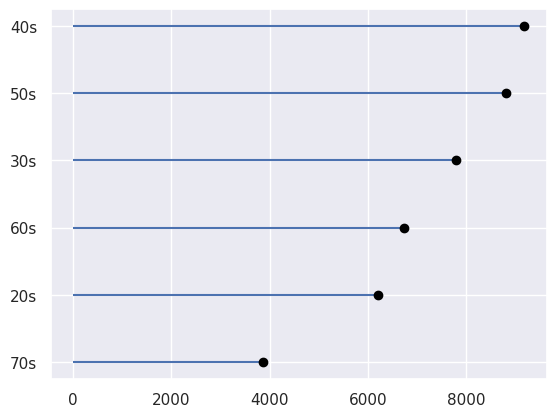

In [42]:
fig, ax = plt.subplots()
ax.hlines(lollipop['Customer_Age_bins'], xmin=0, xmax=lollipop['Credit_Limit'])
ax.plot(lollipop['Credit_Limit'], lollipop['Customer_Age_bins'], "o", color='black');

#Data Visualizations: Data Tables

Coming back to our business problem, we want to understand something about Customers who are leaving. Let's see if we can see anything obvious about their behavior:

In [43]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Customer_Age_bins', 'Credit_Limit_Normalized',
       'Credit_Limit_Log_Transformed'],
      dtype='object')

In [44]:
data.groupby([ 'Attrition_Flag']).agg({
               'CLIENTNUM':'nunique',
               'Customer_Age': 'mean',
               'Dependent_count': 'mean',
               'Months_on_book': 'mean',
               'Total_Relationship_Count': 'mean',
               'Months_Inactive_12_mon': 'mean',
               'Contacts_Count_12_mon': 'mean',
               'Credit_Limit': 'mean',
               'Total_Revolving_Bal': 'mean',
               'Avg_Open_To_Buy': 'mean',
               'Total_Amt_Chng_Q4_Q1': 'mean',
               'Total_Trans_Amt': 'mean',
               'Total_Trans_Ct': 'mean',
               'Total_Ct_Chng_Q4_Q1': 'mean',
               'Avg_Utilization_Ratio': 'mean'
            })

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,
Attrited Customer,1627,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,8500,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


To see the groups more clearly, we can use the `Transpose` function. This will swap Columns and Rows.

In [45]:
data_pivot = data.groupby(['Attrition_Flag']).agg({
                           'CLIENTNUM':'nunique', # number of unique customers in each group
                           'Customer_Age': 'mean', # the rest are looking at the mean per group
                           'Dependent_count': 'mean',
                           'Months_on_book': 'mean',
                           'Total_Relationship_Count': 'mean',
                           'Months_Inactive_12_mon': 'mean',
                           'Contacts_Count_12_mon': 'mean',
                           'Credit_Limit': 'mean',
                           'Total_Revolving_Bal': 'mean',
                           'Avg_Open_To_Buy': 'mean',
                           'Total_Amt_Chng_Q4_Q1': 'mean',
                           'Total_Trans_Amt': 'mean',
                           'Total_Trans_Ct': 'mean',
                           'Total_Ct_Chng_Q4_Q1': 'mean',
                           'Avg_Utilization_Ratio': 'mean'
                        }).T

data_pivot

Attrition_Flag,Attrited Customer,Existing Customer
CLIENTNUM,1627.000000,8500.000000
Customer_Age,46.659496,46.262118
Dependent_count,2.402581,2.335412
Months_on_book,36.178242,35.880588
Total_Relationship_Count,3.279656,3.914588
Months_Inactive_12_mon,2.693301,2.273765
Contacts_Count_12_mon,2.972342,2.356353
Credit_Limit,8136.039459,8726.877518
Total_Revolving_Bal,672.822987,1256.604118
Avg_Open_To_Buy,7463.216472,7470.273400


Instead of trying to understand the differences by visual inspection, let's calculate the differences between groups and sort to see where they differ the most.

In [46]:
data_pivot['Diff'] = data_pivot['Attrited Customer'] / data_pivot['Existing Customer'] - 1

data_pivot.sort_values('Diff')

Attrition_Flag,Attrited Customer,Existing Customer,Diff
CLIENTNUM,1627.000000,8500.000000,-0.808588
Total_Revolving_Bal,672.822987,1256.604118,-0.464570
Avg_Utilization_Ratio,0.162475,0.296412,-0.451860
Total_Trans_Ct,44.933620,68.672588,-0.345683
Total_Trans_Amt,3095.025814,4654.655882,-0.335069
Total_Ct_Chng_Q4_Q1,0.554386,0.742434,-0.253286
Total_Relationship_Count,3.279656,3.914588,-0.162196
Total_Amt_Chng_Q4_Q1,0.694277,0.772510,-0.101271
Credit_Limit,8136.039459,8726.877518,-0.067703
Avg_Open_To_Buy,7463.216472,7470.273400,-0.000945


We can see that the `Total_Revolving_Bal` and `Avg_Utilization_Ratio` along with `Total_Trans_Ct` and `Total_Trans_Amt` show the biggest differences, all showing 30% or more below Existing Customers.

#Relationships

The next thing we may be interested in is how variables move with (positively correlated) or against (negatively correlated) each other. We can do this quickly for the whole numerical dataset (or a subset) using a pairplot or pairgrid


This is a nice visualization since it will show relationships between each numerical variable and every other one in the dataset as well as histograms along the diagonal.

When thinking about correlation, there can be several outcomes:

    1) Weak, strong or no correlation
    2) Positive or negative
    
Thus, you can have weak (or strong) positive, weak (or strong) negative, or no correlation. Scatter plots along with a correlation coefficient can help us understand this relationship more.

**Remember**: Correlation does not imply causation.

Before running our entire dataset through a pairplot, we will simplify to just the numerical data.

In [47]:
numeric_data = data._get_numeric_data()

In [48]:
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_Normalized', 'Credit_Limit_Log_Transformed'],
      dtype='object')

Since this is a computationally expensive operation, and we will not gain new information from some of these variables (like CLLIENTNUM) we will simplify even further.

In [49]:
numeric_data = data[['Credit_Limit', 'Total_Revolving_Bal', 'Months_on_book',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

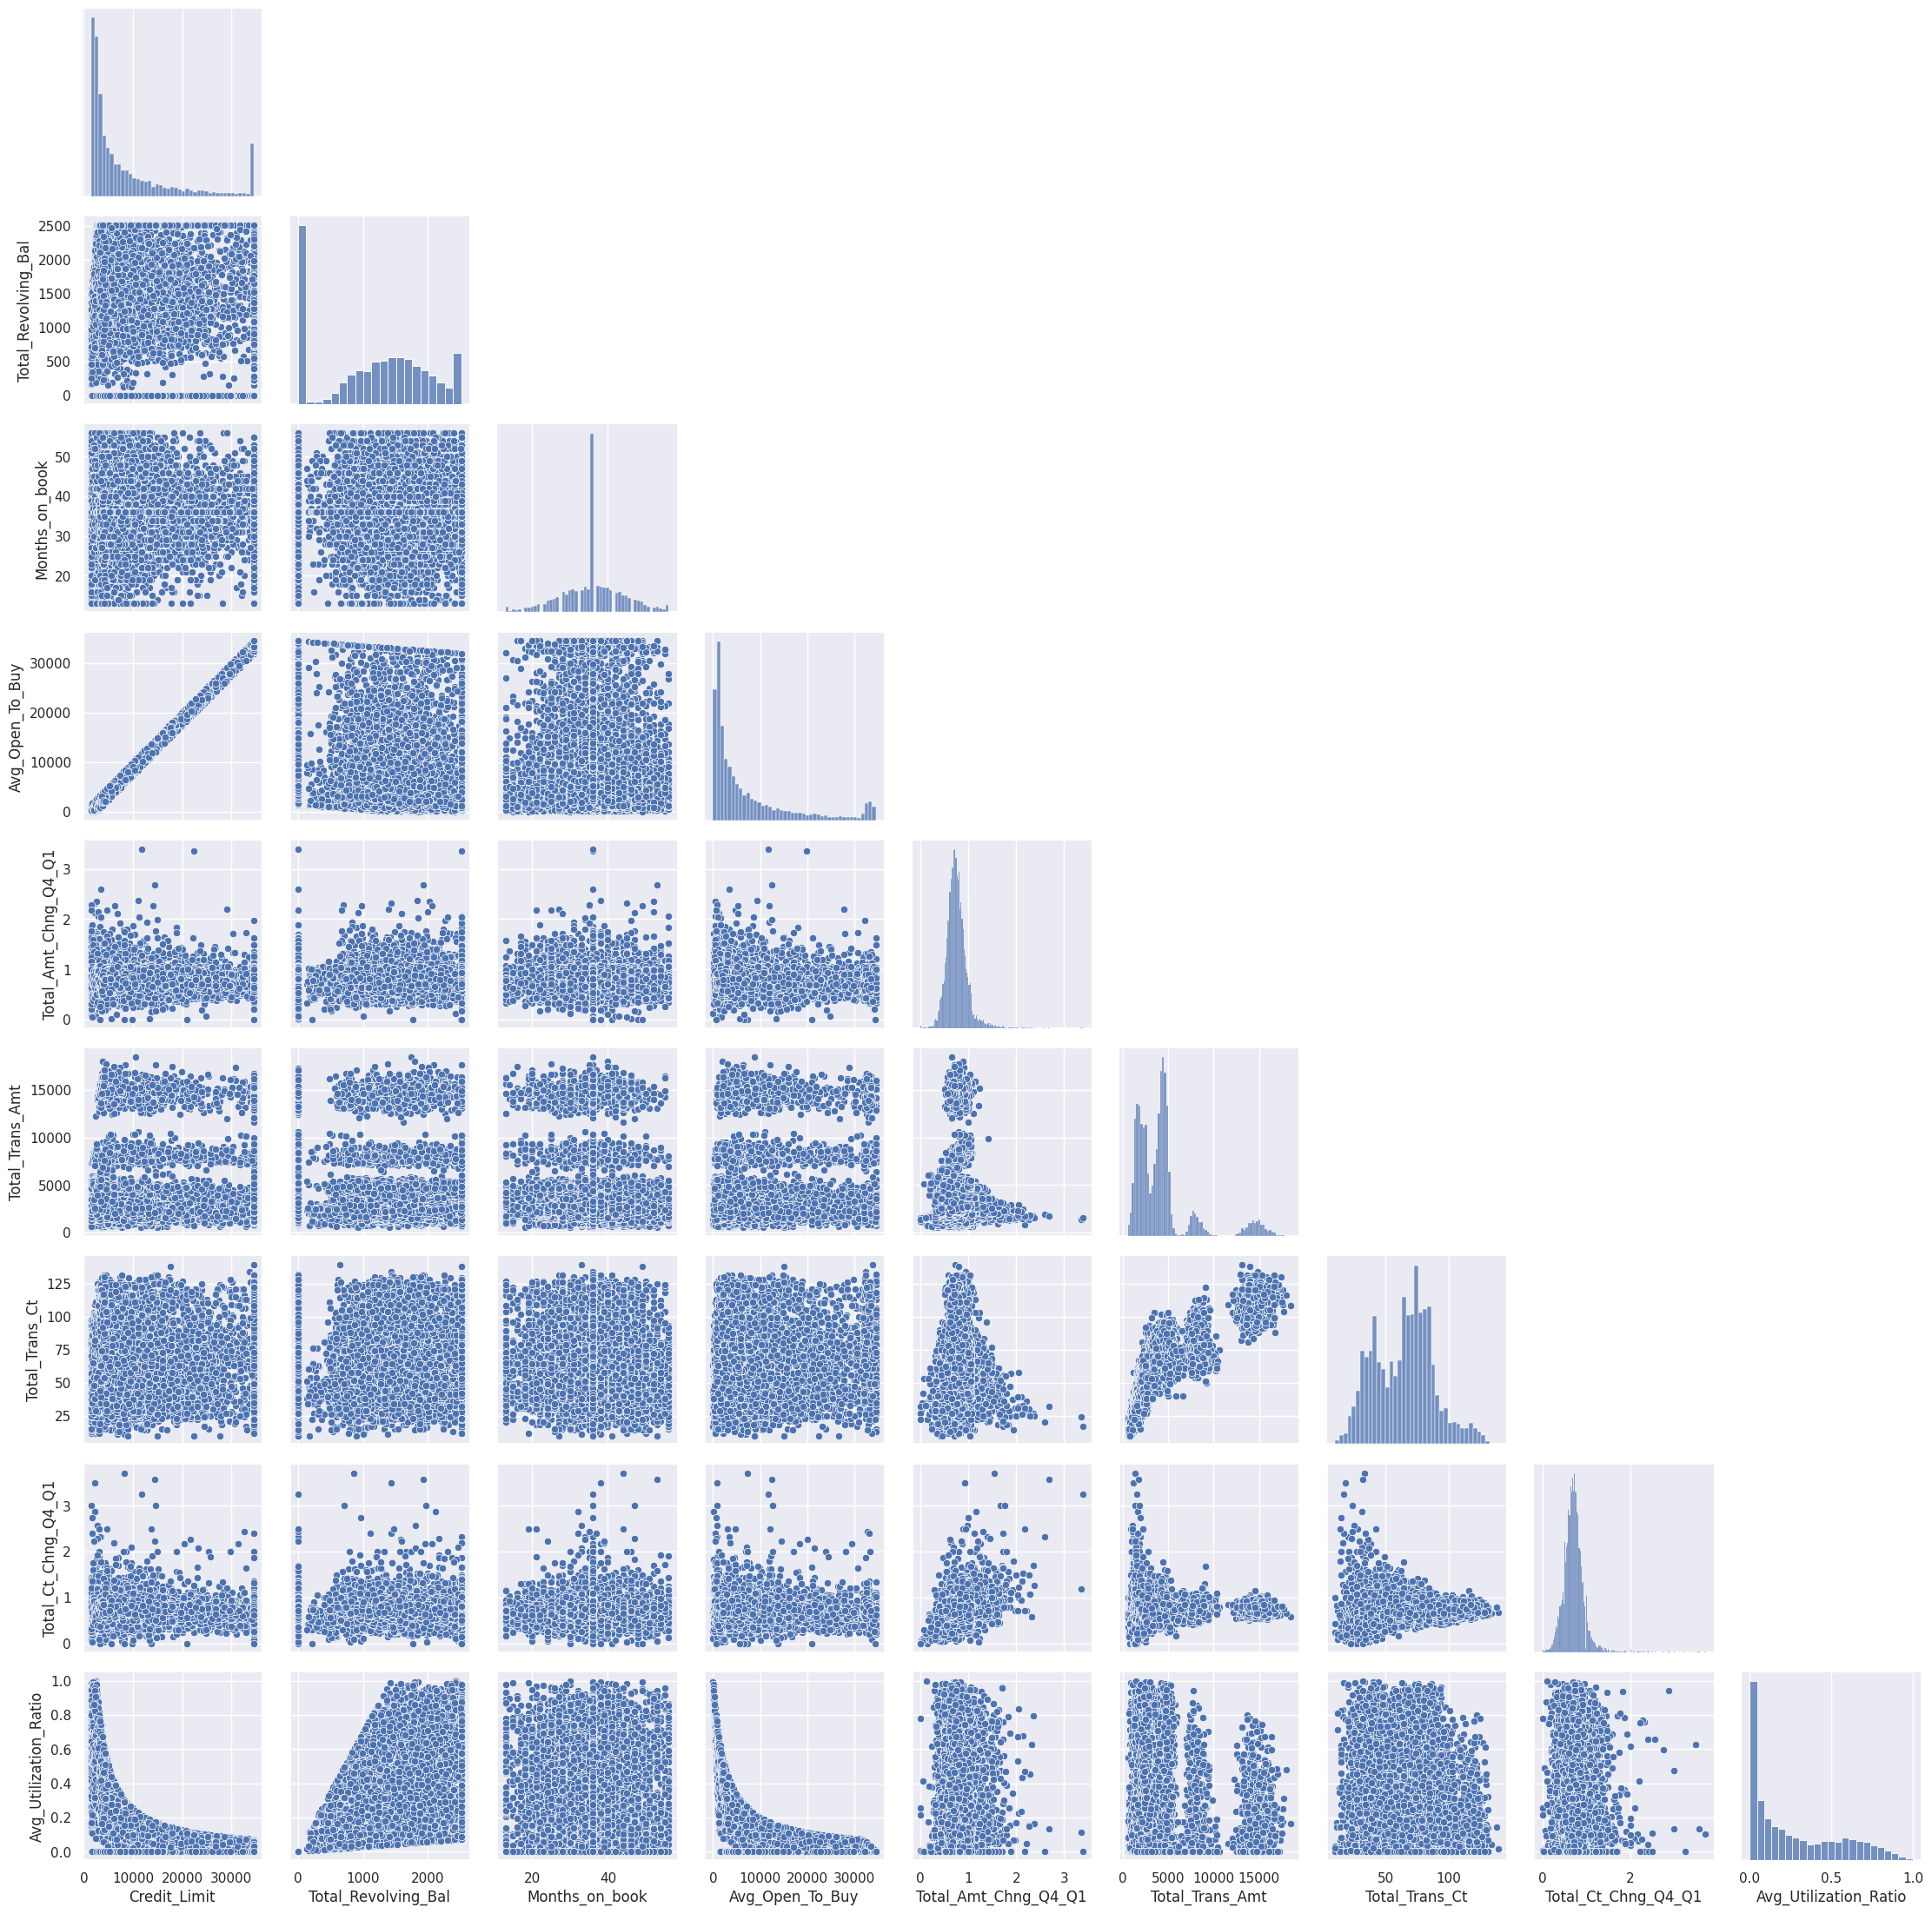

In [50]:
g = sns.PairGrid(numeric_data, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

Let's double click into one of these scatter plots that looks interesting. The one with `Total_Trans_Amt` and `Total_Trans_Ct`.

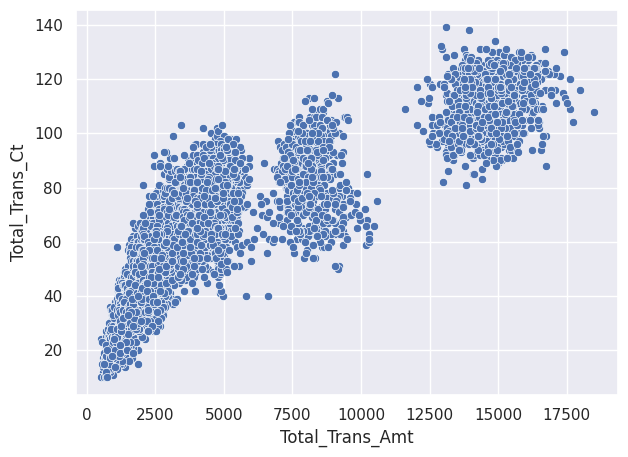

In [51]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data);

This plot clearly shows three distinct groups! Let's see if anything shows up when we add the `Attrition_Flag` as a **Hue**.

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

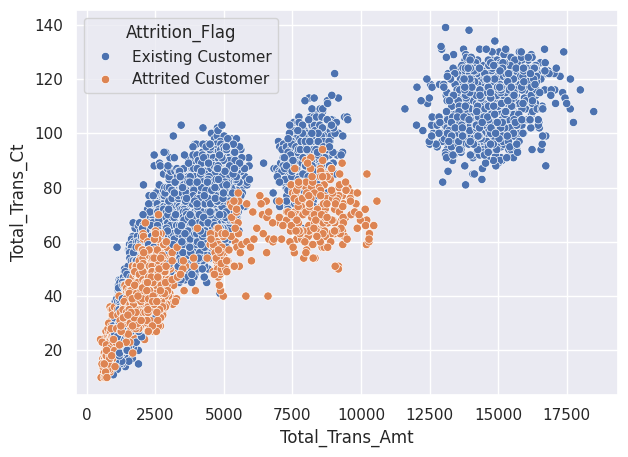

In [52]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

Looks like the top group doesn't have a single attrited customer! And that number looks to be around $11K.

**Finding #1: No attrited customer above $11K of spend**

#Ridgeplot

We've seen that there are no customers who have churned that have spent **$11K or more**, let's use our knowledge of how to create bins and separate these groups from each other so we can effectively look at their differences.

In [54]:
bins = [0, 11000, 900000]
labels = ['Group 1', 'Group 2']
data['Total_Trans_Amt_bin'] = pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True, right=False)

In [55]:
data.groupby(['Total_Trans_Amt_bin', 'Attrition_Flag']).agg({
     'CLIENTNUM':'nunique',
    'Customer_Age': 'mean',
    'Dependent_count': 'mean',
    'Months_on_book': 'mean',
    'Total_Relationship_Count': 'mean',
    'Months_Inactive_12_mon': 'mean',
    'Contacts_Count_12_mon': 'mean',
    'Credit_Limit': 'mean',
    'Total_Revolving_Bal': 'mean',
    'Avg_Open_To_Buy': 'mean',
    'Total_Amt_Chng_Q4_Q1': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Trans_Ct': 'mean',
    'Total_Ct_Chng_Q4_Q1': 'mean',
    'Avg_Utilization_Ratio': 'mean'
}).T

<ipython-input-55-d423ad54e0ff>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Total_Trans_Amt_bin                Group 1                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                      1627.000000       7753.000000   
Customer_Age                     46.659496         46.373920   
Dependent_count                   2.402581          2.341545   
Months_on_book                   36.178242         35.964272   
Total_Relationship_Count          3.279656          4.064620   
Months_Inactive_12_mon            2.693301          2.279376   
Contacts_Count_12_mon             2.972342          2.369018   
Credit_Limit                   8136.039459       8213.629808   
Total_Revolving_Bal             672.822987       1245.908165   
Avg_Open_To_Buy                7463.216472       6967.721643   
Total_Amt_Chng_Q4_Q1              0.694277          0.772248   
Total_Trans_Amt                3095.025814       3686.943506   
Total_Trans_Ct                   44.933620         64.658326   
Total_Ct_Chng_Q4_Q1               0.554386          0.741687   
Avg_Utilization_Ratio             0.162475          0.307600   

Total_Trans_Amt_bin                Group 2                    
Attrition_Flag           Attrited Customer Existing Customer  
CLIENTNUM                              0.0        747.000000  
Customer_Age                           NaN         45.101740  
Dependent_count                        NaN          2.271754  
Months_on_book                         NaN         35.012048  
Total_Relationship_Count               NaN          2.357430  
Months_Inactive_12_mon                 NaN          2.215529  
Contacts_Count_12_mon                  NaN          2.224900  
Credit_Limit                           NaN      14053.797858  
Total_Revolving_Bal                    NaN       1367.615797  
Avg_Open_To_Buy                        NaN      12686.182062  
Total_Amt_Chng_Q4_Q1                   NaN          0.775229  
Total_Trans_Amt                        NaN      14698.396252  
Total_Trans_Ct                         NaN        110.336011  
Total_Ct_Chng_Q4_Q1                    NaN          0.750190  
Avg_Utilization_Ratio                  NaN          0.180288

Earlier, we had highlighted the following variables that showed differences between Churned and Existing customers:

    1) Total_Revolving_Bal (still a good indicator)
    2) Avg_Utilization_Ratio (not good anymore, since attrited and existing have similar values)
    3) Total_Trans_Ct (still a good indicator)
    4) Total_Trans_Amt (not good anymore, since attrited and existing have similar values)


But also notice how the Q4-Q1 change is significantly different for Churned customers too! This indicates that churned customers are spending significantly less (-25% lower than their counterparts) after the holiday season, pulling back much more sigificantly. This is something we can probably build a recommendation off of. If we can impact this variable, we can also directly impact the `Total_Trans_Ct`!

We will use `seaborn`'s `FacetGrid` method to allow us to build this subplot and use a `Kernal Density Plot` (which is just a continuous or smoother distribution of our original hisograms).

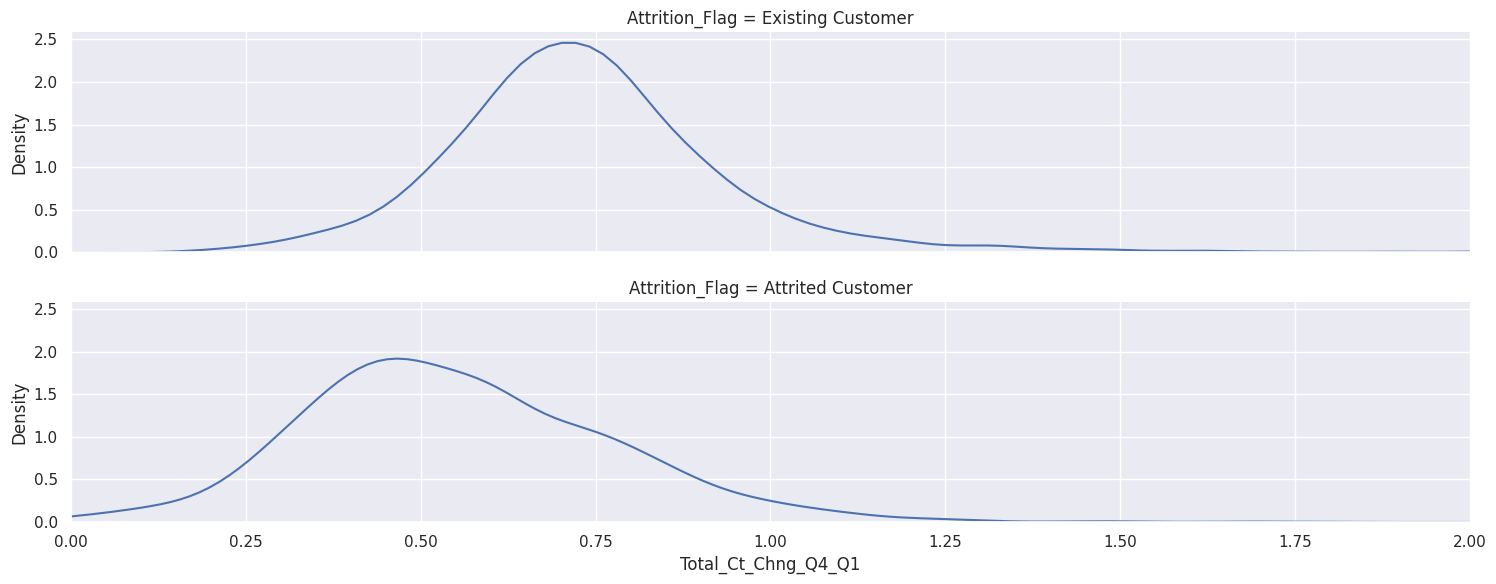

In [56]:
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1")

plt.xlim(0,2);

#Putting it all together

Let's start to declutter our final scatterplot and start by doing the following:

    1) Changing the background color to white (effectively removing the gridlines)
    2) Removing the border

In [57]:
sns.set_theme(style="white")
palette = sns.color_palette("Set2", 12)

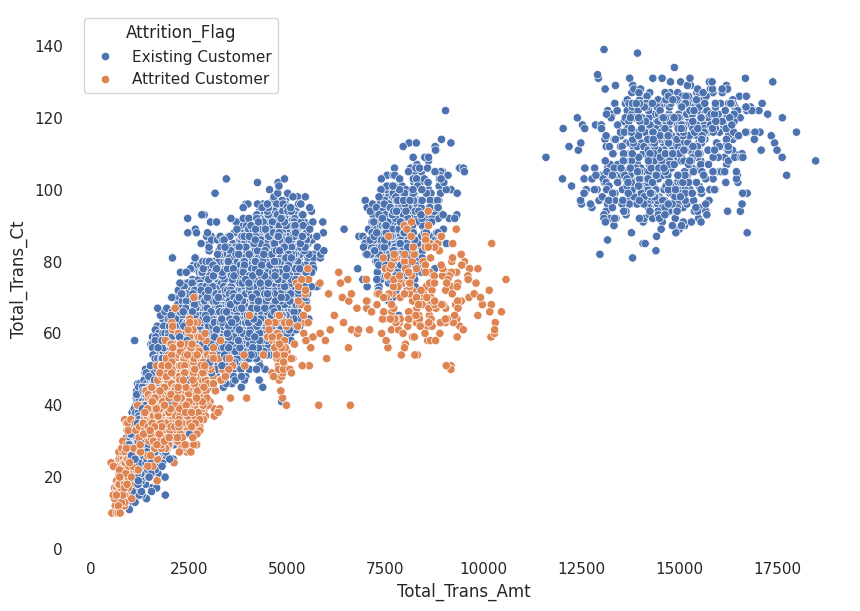

In [58]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

sns.despine(bottom = True, left = True) # removes the border
plt.ylim(0, 150); # changes the limits of the yaxis

Let's now **edit** our `x` and `y` labels to make them more readable and **add** in a `title`.

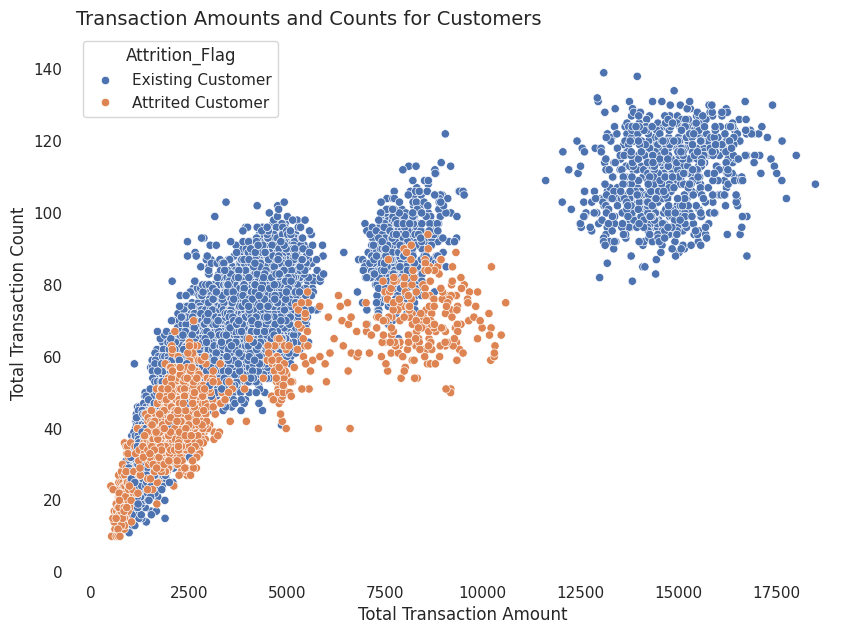

In [59]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

sns.despine(bottom = True, left = True) # removes the border
plt.ylim(0, 150) # changes the limits of the yaxis

plt.xlabel('Total Transaction Amount') # axis labels
plt.ylabel('Total Transaction Count') # axis labels
plt.title("Transaction Amounts and Counts for Customers", loc='left', size=14); # title

Lastly let's add in a vertical line to separate the two groups and annotate to guide the reader as to what the insight we want them to takeaway.

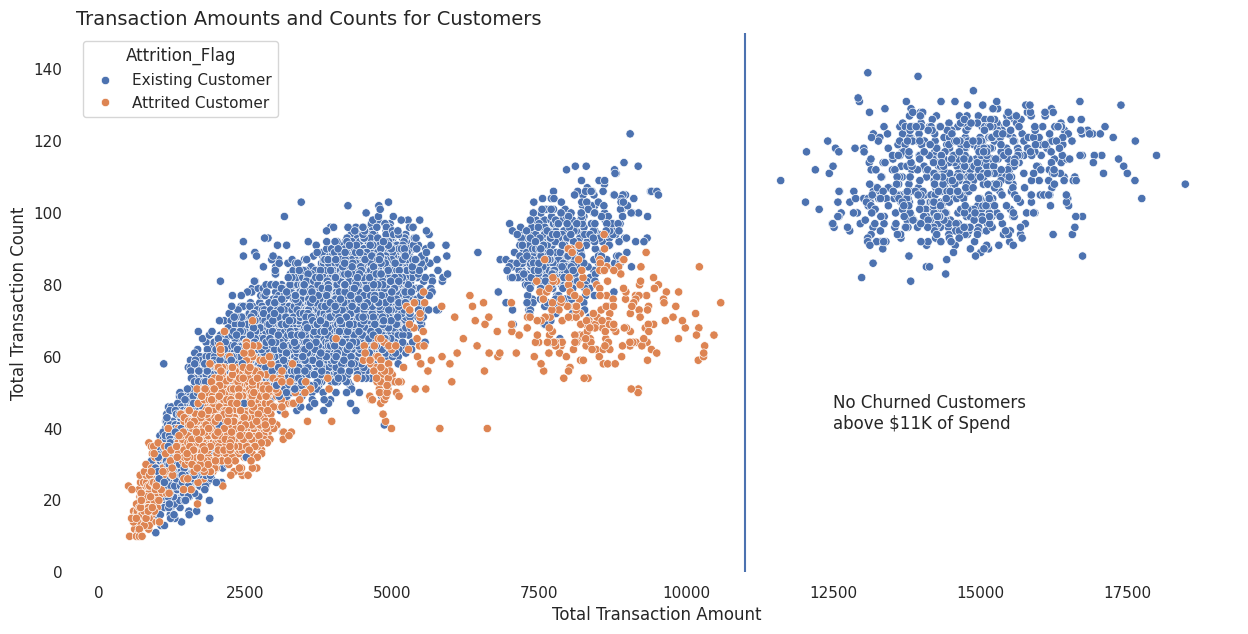

In [60]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

sns.despine(bottom = True, left = True) # removes the border
plt.ylim(0, 150) # changes the limits of the yaxis

plt.xlabel('Total Transaction Amount') # axis labels
plt.ylabel('Total Transaction Count') # axis labels
plt.title("Transaction Amounts and Counts for Customers", loc='left', size=14) # title

plt.vlines(11000,0,150) # adds in a vertical line at the $11k mark
plt.text(12500, 40, "No Churned Customers \nabove $11K of Spend"); # annotation

Nice! This looks much better!

Let's do the same thing with our `Kernal Density Plots`, but you'll see how we tranfrom them into `Ridge Plots`.

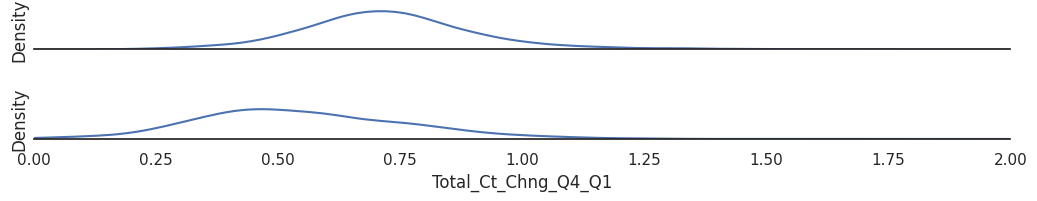

In [61]:
sns.set_theme(style="white")
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1")
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)
plt.xlim(0,2);

(0.0, 2.0)

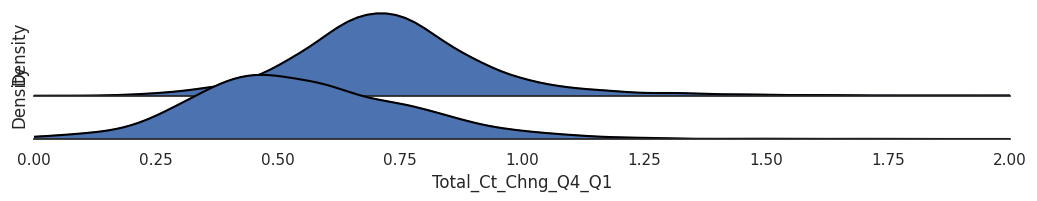

In [62]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

plt.xlim(0,2)

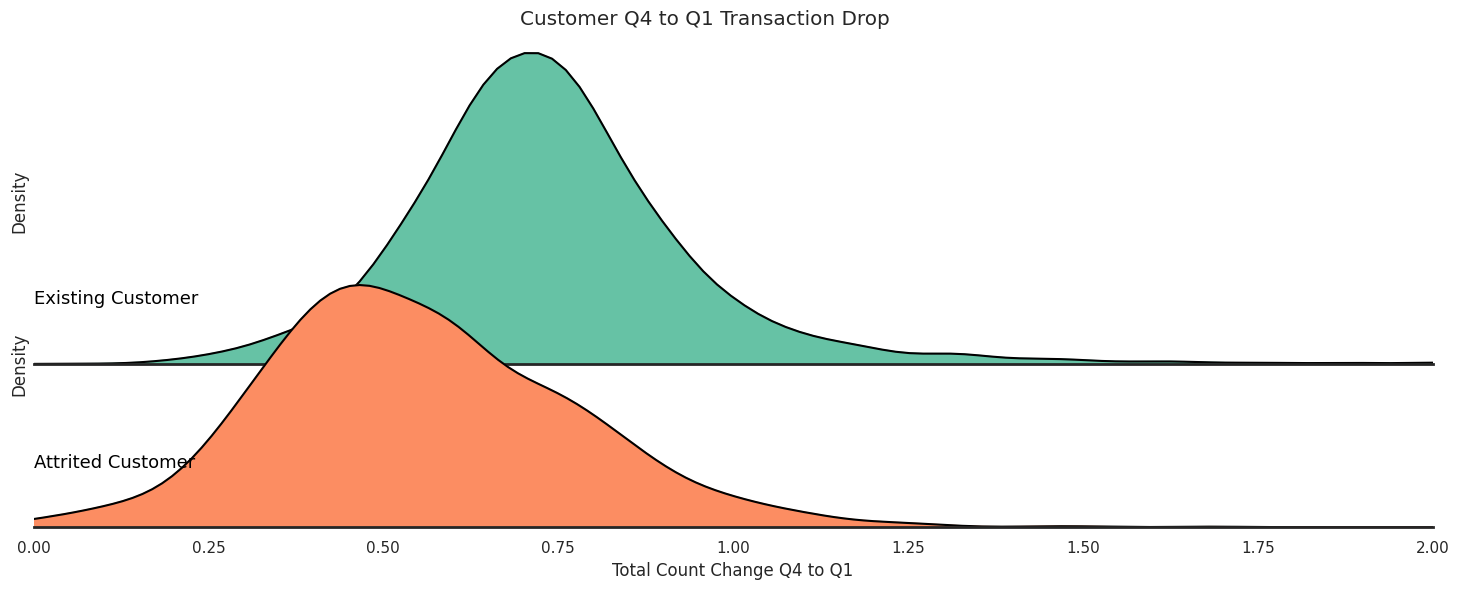

In [63]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(data, palette=palette, row="Attrition_Flag", hue="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Attrition_Flag")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Total Count Change Q4 to Q1")
g.despine(left=True)
plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)

plt.xlim(0,2);

#Recommendation: Promotions during Q1 time to keep the spending levels high.

Theory: the more you spend the more attached you feel to the card, it's benefits, etc. A "prevent the cliff" campaign where all customers who have historically shown a strong drop off, will get targeted with this promo.